In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from bokeh.models import LabelSet, HoverTool, ColumnDataSource


In [ ]:
finalMerged = pd.read_csv("finalMergedTable.csv",sep = ",", decimal = ",") 
dockingData = pd.read_csv("docking_score.csv",sep = ";", decimal = ",") 

In [14]:
dockingData.shape

(30, 1)

In [15]:
dockingData.head()


,SMILES;ChEMBLID;docking_score
CC(C)c1c(NC(=O)Nc2ccc(Cl)cc2)c(=O)n(-c2ccccc2)n1C;7T6S - prepared_chainR_ligand;-6,78994
Cn1c(C(C)(C)C)c(NC(=O)Nc2ccc(Cl)cc2)c(=O)n1-c1ccccc1;CHEMBL377226;-6,45746
Cc1c(NC(=O)Nc2ccc(I)cc2)c(=O)n(-c2ccccc2)n1C;CHEMBL208884;-6,17932
CSc1ccc(NC(=O)Nc2c(C(C)C)n(C)n(-c3cnc4ccccc4c3)c2=O)cc1;CHEMBL379762;-6,91294
CC(C)c1c(NC(=O)Nc2ccc(Cl)cc2)c(=O)n(-c2ccccc2)n1C;CHEMBL379761;-6,15005


In [28]:
dockingData = dockingData.iloc[1:]
#this is for drop the first row in the table

In [25]:
dockingData = dockingData.drop("SMILES", axis=1)

In [29]:
dockingData.head()

,ChEMBLID,docking_score
1,CHEMBL377226,-6.45746
2,CHEMBL208884,-6.17932
3,CHEMBL379762,-6.91294
4,CHEMBL379761,-6.15005
5,CHEMBL211220,-6.17831


In [30]:
finalMerged.head()

,ChEMBLID,Smiles,pChEMBL_Value,activity,Similarity
0,CHEMBL379761,CC(C)c1c(NC(=O)Nc2ccc(Cl)cc2)c(=O)n(-c2ccccc2)n1C,7.389978975,active,100.0
1,CHEMBL379853,CC(C)c1c(NC(=O)Nc2ccc(Cl)cc2)c(=O)n(-c2cncnc2)n1C,6.602059991,partial_active,75.0
2,CHEMBL377169,CC(C)c1c(NC(=O)Nc2ccccc2Cl)c(=O)n(-c2ccccc2)n1C,5.0,partial_active,74.00000095
3,CHEMBL210298,Cc1c(NC(=O)Nc2ccc(Cl)cc2)c(=O)n(-c2ccccc2)n1C,6.30980392,partial_active,73.46938848
4,CHEMBL210303,CC(C)c1c(NC(=O)Nc2ccc(Cl)cc2)c(=O)n(-c2cnc3ccc...,7.096910013,partial_active,70.68965435


In [31]:
dockingMerged = finalMerged.merge(dockingData, on="ChEMBLID", how="left")

In [32]:
dockingMerged.head()

,ChEMBLID,Smiles,pChEMBL_Value,activity,Similarity,docking_score
0,CHEMBL379761,CC(C)c1c(NC(=O)Nc2ccc(Cl)cc2)c(=O)n(-c2ccccc2)n1C,7.389978975,active,100.0,-6.15005
1,CHEMBL379853,CC(C)c1c(NC(=O)Nc2ccc(Cl)cc2)c(=O)n(-c2cncnc2)n1C,6.602059991,partial_active,75.0,-6.38234
2,CHEMBL377169,CC(C)c1c(NC(=O)Nc2ccccc2Cl)c(=O)n(-c2ccccc2)n1C,5.0,partial_active,74.00000095,NaN
3,CHEMBL210298,Cc1c(NC(=O)Nc2ccc(Cl)cc2)c(=O)n(-c2ccccc2)n1C,6.30980392,partial_active,73.46938848,-6.61631
4,CHEMBL210303,CC(C)c1c(NC(=O)Nc2ccc(Cl)cc2)c(=O)n(-c2cnc3ccc...,7.096910013,partial_active,70.68965435,-6.76103


In [33]:
dockingMerged = dockingMerged.dropna(subset = "docking_score")

In [54]:
dockingMerged = dockingMerged.sort_values("docking_score", ascending = [True])

In [56]:
dockingMerged.tail(2)

,ChEMBLID,Smiles,pChEMBL_Value,activity,Similarity,docking_score
20,CHEMBL377642,COc1ccc(NC(=O)Nc2c(C)n(C)n(-c3ccccc3)c2=O)cc1,5.563837353,partial_active,55.3571403,-5.50875
8,CHEMBL380160,Cc1c(NC(=O)Nc2ccc(C(C)C)cc2)c(=O)n(-c2ccccc2)n1C,4.910094889,inactive,67.30769277,-5.19986


In [83]:
dockingMerged = dockingMerged.sort_values("pChEMBL_Value", ascending =[True])

In [84]:
pChemblValue_array = dockingMerged["pChEMBL_Value"].to_numpy()

In [85]:
print(pChemblValue_array)

['4.910094889' '5.230622674' '5.289882635' '5.314258261' '5.431798276'
 '5.563837353' '5.832682665' '5.899629455' '6.008773924' '6.113509275'
 '6.26760624' '6.30980392' '6.508638306' '6.602059991' '6.769551079'
 '6.823908741' '6.853871964' '7.0' '7.0' '7.045757491' '7.080921908'
 '7.091514981' '7.096910013' '7.356547324' '7.366531544' '7.389978975'
 '7.522878745' '7.522878745' '7.638272164']


In [86]:
dockingScore_array = dockingMerged["docking_score"].to_numpy()

In [87]:
print(dockingScore_array)

[-5.19986 -6.10393 -7.35666 -6.33202 -6.74491 -5.50875 -7.41252 -6.31815
 -6.23326 -6.29508 -6.59195 -6.61631 -6.20057 -6.38234 -6.24913 -7.21987
 -6.27466 -5.91999 -6.80953 -6.2172  -6.55223 -5.9473  -6.76103 -6.99069
 -6.17831 -6.15005 -6.91294 -6.17932 -6.45746]


In [88]:
similarityLabel = dockingMerged["Similarity"].to_numpy()

In [89]:
print(similarityLabel)

['67.30769277' '48.38709533' '49.23076928' '57.40740895' '54.38596606'
 '55.3571403' '48.48484993' '59.61538553' '50.84745884' '55.3571403'
 '63.79310489' '73.46938848' '47.61904776' '75.0' '55.3571403'
 '56.66666627' '69.23077106' '52.38095522' '54.38596606' '57.40740895'
 '47.61904776' '69.09090877' '70.68965435' '54.54545617' '57.62711763'
 '100.0' '55.38461804' '57.40740895' '69.23077106']


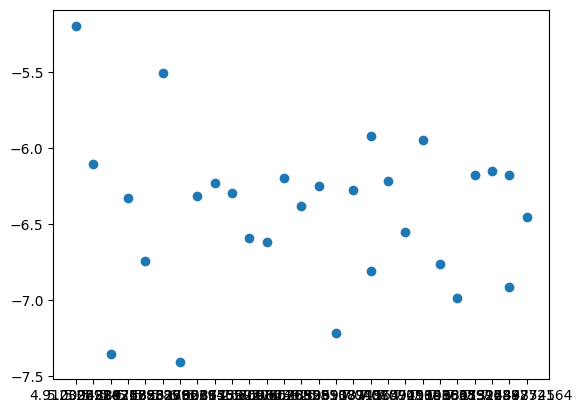

In [70]:
plt.scatter(pChemblValue_array, dockingScore_array)

In [78]:
print(similarityLabel)

['67.30769277' '48.38709533' '49.23076928' '57.40740895' '54.38596606'
 '55.3571403' '48.48484993' '59.61538553' '50.84745884' '55.3571403'
 '63.79310489' '73.46938848' '47.61904776' '75.0' '55.3571403'
 '56.66666627' '69.23077106' '52.38095522' '54.38596606' '57.40740895'
 '47.61904776' '69.09090877' '70.68965435' '54.54545617' '57.62711763'
 '100.0' '55.38461804' '57.40740895' '69.23077106']


In [90]:
ChemblID_array = dockingMerged["ChEMBLID"].to_numpy()

In [97]:
similarityLabel = [float(num) for num in similarityLabel]

In [98]:
print(similarityLabel)

[67.30769277, 48.38709533, 49.23076928, 57.40740895, 54.38596606, 55.3571403, 48.48484993, 59.61538553, 50.84745884, 55.3571403, 63.79310489, 73.46938848, 47.61904776, 75.0, 55.3571403, 56.66666627, 69.23077106, 52.38095522, 54.38596606, 57.40740895, 47.61904776, 69.09090877, 70.68965435, 54.54545617, 57.62711763, 100.0, 55.38461804, 57.40740895, 69.23077106]


In [99]:
similarityLabel_array = [round(num,2) for num in similarityLabel]

In [100]:
print(similarityLabel_array)

[67.31, 48.39, 49.23, 57.41, 54.39, 55.36, 48.48, 59.62, 50.85, 55.36, 63.79, 73.47, 47.62, 75.0, 55.36, 56.67, 69.23, 52.38, 54.39, 57.41, 47.62, 69.09, 70.69, 54.55, 57.63, 100.0, 55.38, 57.41, 69.23]


In [101]:
print(pChemblValue_array)

['4.910094889' '5.230622674' '5.289882635' '5.314258261' '5.431798276'
 '5.563837353' '5.832682665' '5.899629455' '6.008773924' '6.113509275'
 '6.26760624' '6.30980392' '6.508638306' '6.602059991' '6.769551079'
 '6.823908741' '6.853871964' '7.0' '7.0' '7.045757491' '7.080921908'
 '7.091514981' '7.096910013' '7.356547324' '7.366531544' '7.389978975'
 '7.522878745' '7.522878745' '7.638272164']


In [102]:
pChemblValue_array = [float(num) for num in pChemblValue_array]

In [103]:
pChemblValue_array = [round(num, 2) for num in pChemblValue_array]

In [215]:
data = {
    "x":pChemblValue_array, "y":dockingScore_array, "label":similarityLabel_array, "Hover":ChemblID_array
    
}

In [216]:
source = ColumnDataSource(data)

In [217]:
p = figure(title="Docking Plot", x_axis_label="pChEMBL Value", y_axis_label="Glide Binding Energy")


In [218]:
p.star(x='x', y='y', source=source, size=10, color="blue", legend_label="Similarity")

GlyphRenderer(id='p1437', ...)

In [219]:
hover = HoverTool()
hover.tooltips = [("ID:","@Hover")]
p.add_tools(hover)

In [220]:
labels = LabelSet(x='x', y='y', text='label', source=source, text_font_size="5pt", y_offset=5)
p.add_layout(labels)

In [221]:
output_file("scatter_plot.html")

In [222]:
show(p)